In [34]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords

# Load positive words
with open(r'positive-words.txt', 'r') as file:
    positive_words = file.read().splitlines()

# Load negative words
with open(r'negative-words.txt', 'r') as file:
    negative_words = file.read().splitlines()

# Load stop words
with open(r'stop.txt', 'r') as file:
    stop_words = file.read().splitlines()
    
# Load your text data
df = pd.read_csv('Elon_musk.csv',encoding='latin-1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [35]:
df = df.rename(columns = {'Unnamed: 0':'index'})

In [36]:
# Text preprocessing function
import string
import spacy
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    #Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
df

,index,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [38]:
# Sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    
    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity
    
    # Classify as positive, negative, or neutral based on custom positive and negative word lists
    if sentiment_polarity > 0:
        return 'positive'
    elif sentiment_polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply preprocessing to the 'text' column
df['processed_text'] = df['Text'].apply(preprocess_text)

# Apply sentiment analysis
df['sentiment'] = df['processed_text'].apply(analyze_sentiment)

# Print or save the results
print(df[['Text', 'sentiment']])

                                                   Text sentiment
0                                @kunalb11 Im an alien  negative
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   neutral
2                   @joerogan @Spotify Great interview!  positive
3                       @gtera27 Doge is underestimated   neutral
4     @teslacn Congratulations Tesla China for amazi...  positive
...                                                 ...       ...
1994  @flcnhvy True, it sounds so surreal, but the n...  positive
1995  @PPathole Make sure to read ur terms &amp; con...   neutral
1996                @TeslaGong @PPathole Samwise Gamgee   neutral
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...  negative
1998                          Progress update August 28   neutral

[1999 rows x 2 columns]


In [39]:
from textblob import TextBlob

text = "The beautiful garden was full of vibrant flowers and the sun was shining brightly"
blob = TextBlob(text)

print(blob.sentiment)

Sentiment(polarity=0.5166666666666667, subjectivity=0.6708333333333333)


In [40]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
from textblob import TextBlob

text = "The beautiful garden was full of vibrant flowers and the sun was shining brightly."
blob = TextBlob(text)


# Part-of-speech Tagging
print("Part-of-speech Tagging:")
print(blob.tags)
print("\n")

# Words Inflection and Lemmatization
print("Words Inflection and Lemmatization:")
print([word.lemmatize() for word in blob.words])
print("\n")

# N-grams
print("N-grams:")
print(blob.ngrams(n=3))
print("\n")

# Sentiment Analysis
print("Sentiment Analysis:")
print(blob.sentiment)


Part-of-speech Tagging:
[('The', 'DT'), ('beautiful', 'JJ'), ('garden', 'NN'), ('was', 'VBD'), ('full', 'JJ'), ('of', 'IN'), ('vibrant', 'JJ'), ('flowers', 'NNS'), ('and', 'CC'), ('the', 'DT'), ('sun', 'NN'), ('was', 'VBD'), ('shining', 'VBG'), ('brightly', 'RB')]


Words Inflection and Lemmatization:
['The', 'beautiful', 'garden', 'wa', 'full', 'of', 'vibrant', 'flower', 'and', 'the', 'sun', 'wa', 'shining', 'brightly']


N-grams:
[WordList(['The', 'beautiful', 'garden']), WordList(['beautiful', 'garden', 'was']), WordList(['garden', 'was', 'full']), WordList(['was', 'full', 'of']), WordList(['full', 'of', 'vibrant']), WordList(['of', 'vibrant', 'flowers']), WordList(['vibrant', 'flowers', 'and']), WordList(['flowers', 'and', 'the']), WordList(['and', 'the', 'sun']), WordList(['the', 'sun', 'was']), WordList(['sun', 'was', 'shining']), WordList(['was', 'shining', 'brightly'])]


Sentiment Analysis:
Sentiment(polarity=0.5166666666666667, subjectivity=0.6708333333333333)


In [42]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [43]:
from nltk import ne_chunk, word_tokenize, pos_tag
text = "Apple is a technology company founded by Steve Jobs."
pos_tags = pos_tag(word_tokenize(text))
ner_result = ne_chunk(pos_tags)
print(pos_tags)
print(ner_result)

[('Apple', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('technology', 'NN'), ('company', 'NN'), ('founded', 'VBN'), ('by', 'IN'), ('Steve', 'NNP'), ('Jobs', 'NNP'), ('.', '.')]
(S
  (GPE Apple/NNP)
  is/VBZ
  a/DT
  technology/NN
  company/NN
  founded/VBN
  by/IN
  (PERSON Steve/NNP Jobs/NNP)
  ./.)


In [44]:
# how many words are in the sentence?
df['word_count'] = df['processed_text'].str.split().apply(len)
df['word_count'].head(10)

0    3
1    7
2    4
3    3
4    8
5    4
6    6
7    4
8    8
9    2
Name: word_count, dtype: int64

In [45]:
df = df.drop(columns = 'Text')
df.sort_values(by='sentiment').tail(10)

,index,processed_text,sentiment,word_count
1330,1331,disruptresearch tesla rampd productivity excep...,positive,10
1331,1332,tesla model amp hospitalgrade hepa air filters...,positive,15
502,503,successful ascent switchover header tanks amp ...,positive,12
501,502,fuel header tank pressure low landing burn cau...,positive,14
499,500,erdayastronaut yeah engines great,positive,4
496,497,erdayastronaut spacex sn8 great reaching apoge...,positive,11
1340,1341,erdayastronaut ppathole spacex were pretty cl...,positive,15
495,496,nasaspaceflight bocachicagal exactly woohoo,positive,4
522,523,rt erdayastronaut theres genuinely magical st...,positive,13
999,1000,cleantechnica limited fsd beta releasing tuesd...,positive,12


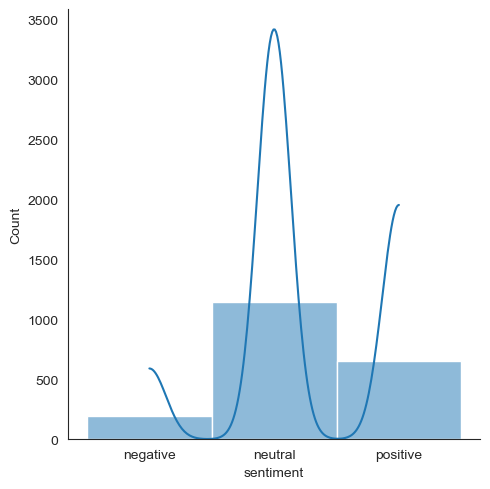

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=df,x='sentiment',kde=True)
plt.show()

<Axes: xlabel='sentiment', ylabel='word_count'>

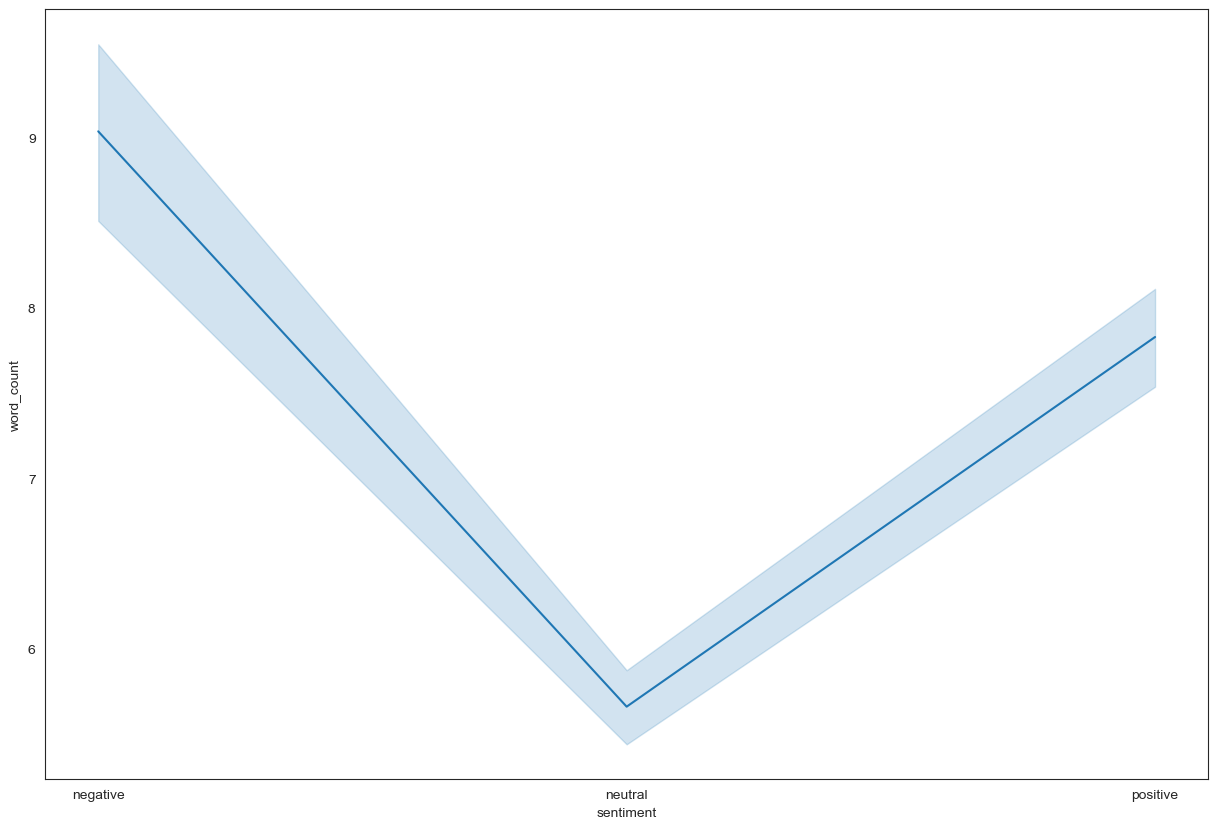

In [47]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='word_count',x='sentiment',data=df)

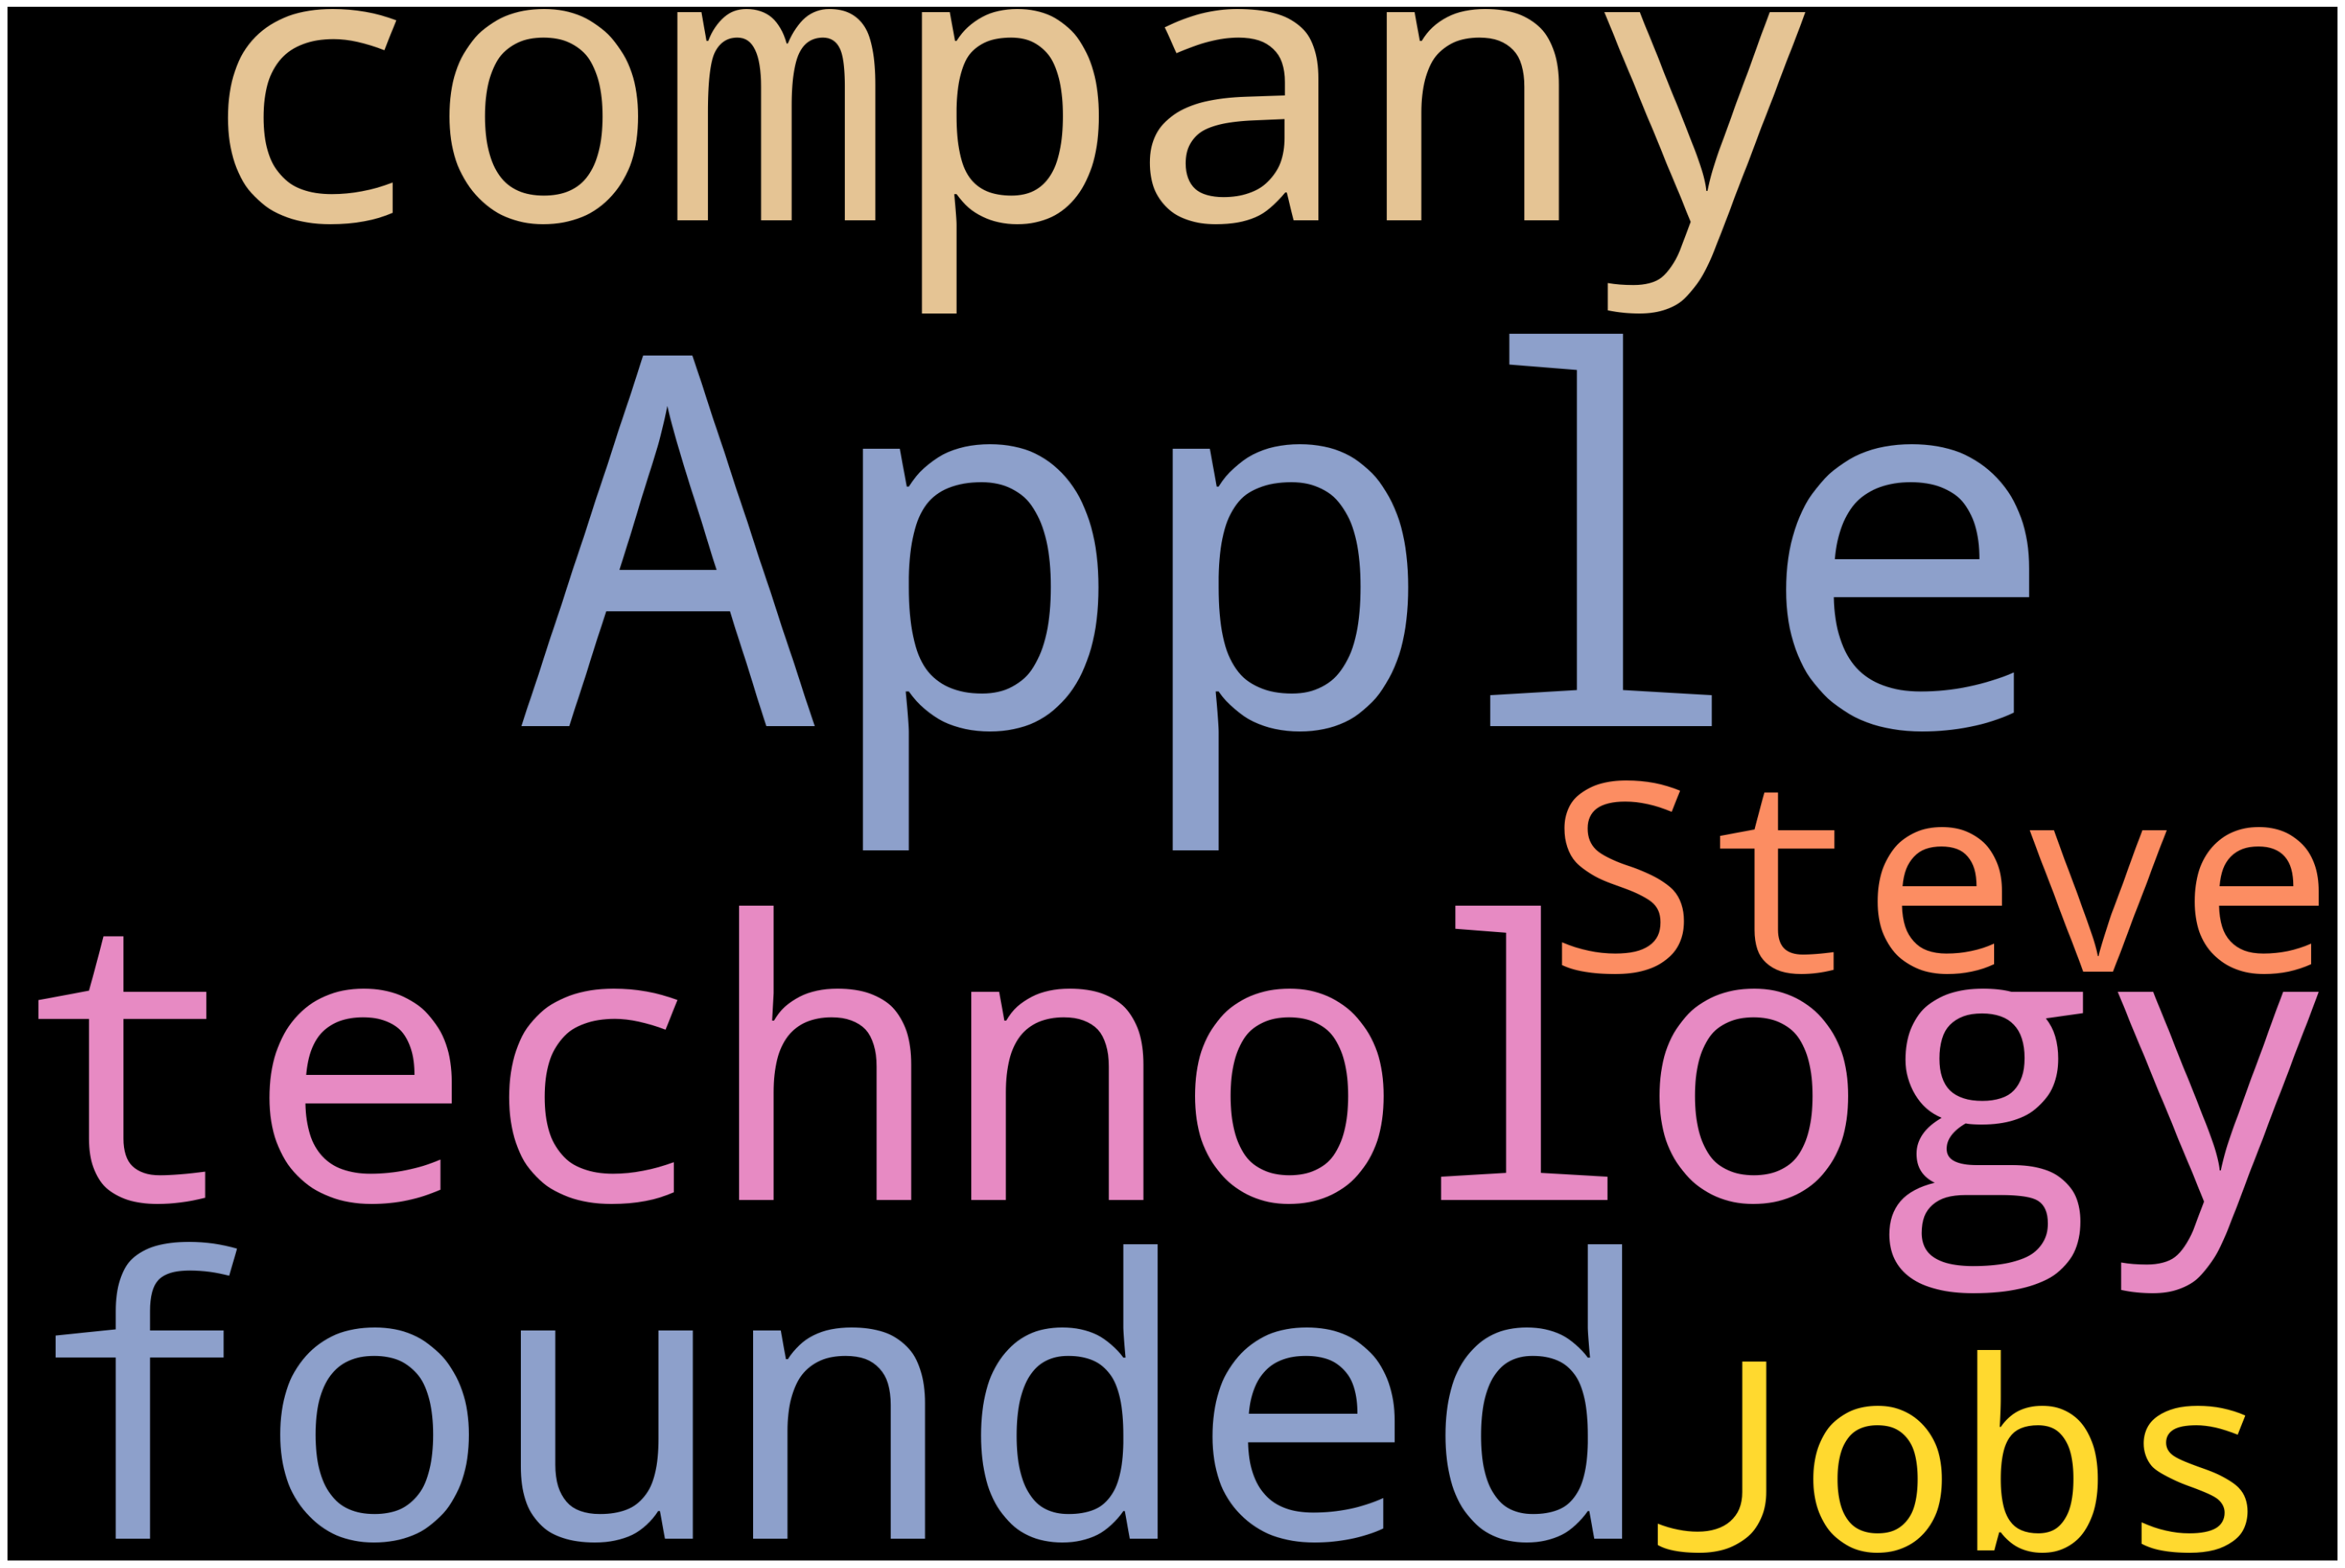

In [48]:
#Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
#%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
# Generate wordcloud
stopwords = stop_words

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)